In [49]:
import numpy as np
import pickle as pkl
import matplotlib.pyplot as plt

In [50]:
DROPOUT_RATES = [0, 0.1, 0.3, 0.5, 0.7]

In [51]:
def load_data():
    rate_to_data = {}
    for dropout_rate in DROPOUT_RATES:
        dropout_rate_str = str(int(dropout_rate * 100)).zfill(2)
        with open(f"output/ex1/output-0d-{dropout_rate_str}.pkl", "rb") as f:
            data = pkl.load(f)
        rate_to_data[dropout_rate] = data
    return rate_to_data

In [52]:
data = load_data()

In [53]:
def plot_mean_val_acc_vs_prune_percent(trials, dropout_rate):
    cka_prune_mean_val_accs = []
    l1_prune_mean_val_accs = []
    for trial in trials:
        cka_prune_mean_val_accs.append(trial["cka_prune"]["val_acc"])
        l1_prune_mean_val_accs.append(trial["l1_prune"]["val_acc"])

    cka_prune_mean_val_acc = np.array(cka_prune_mean_val_accs).mean(axis=0)
    l1_prune_mean_val_acc = np.array(l1_prune_mean_val_accs).mean(axis=0)
    x = list(range(1, len(cka_prune_mean_val_acc) + 1))

    plt.title(label=f"L1 vs CKA Pruning with p={dropout_rate}")
    plt.xlabel("# of neurons pruned")
    plt.ylabel("Validation accuracy")
    plt.plot(x, cka_prune_mean_val_acc, label="cka_val_acc")
    plt.plot(x, l1_prune_mean_val_acc, label="l1_val_acc")
    plt.grid()
    plt.legend()
    plt.show()

    area_between_curves = (cka_prune_mean_val_acc - l1_prune_mean_val_acc).sum()
    print(f"The area between the curves is {area_between_curves}")

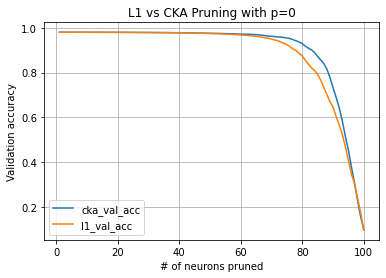

The area between the curves is 1.6487266528109714


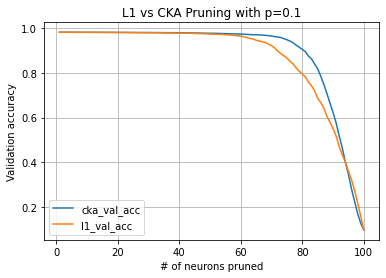

The area between the curves is 2.2433200361828005


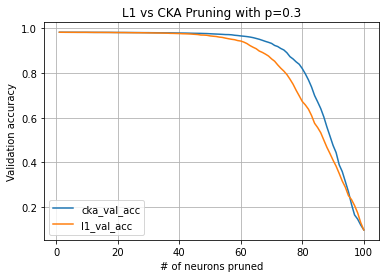

The area between the curves is 2.9584333511690293


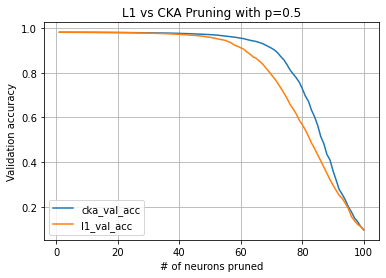

The area between the curves is 4.029159985482692


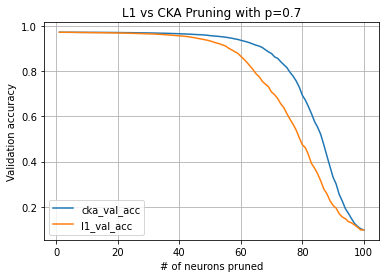

The area between the curves is 6.282553283373516


In [54]:
for dropout_rate in DROPOUT_RATES:
    plot_mean_val_acc_vs_prune_percent(data[dropout_rate], dropout_rate)

In [55]:
def plot_mean_val_acc_vs_mean_cka(trials, dropout_rate):
    cka_prune_val_accs = []
    cka_prune_ckas = []
    for trial in trials:
        for acc, cka in zip(trial["cka_prune"]["val_acc"], trial["cka_prune"]["cka"]):
            if acc < 0.97: continue
            cka_prune_val_accs.append(acc)
            cka_prune_ckas.append(cka)
        # cka_prune_val_accs.extend(trial["cka_prune"]["val_acc"])
        # cka_prune_ckas.extend(trial["cka_prune"]["cka"])

    plt.title(label=f"L1 vs CKA Pruning with p={dropout_rate}")
    plt.xlabel("CKA")
    plt.ylabel("Validation accuracy")
    plt.scatter(cka_prune_ckas, cka_prune_val_accs)
    plt.grid()
    plt.legend()
    plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


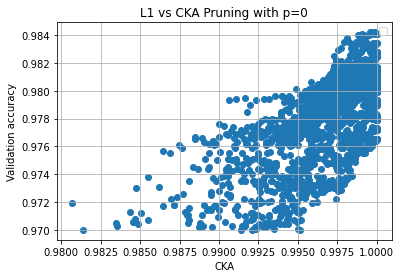

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


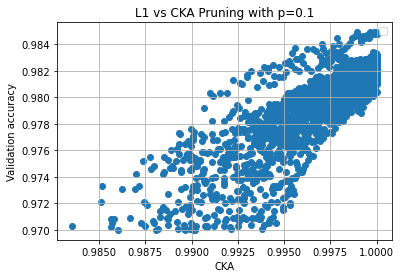

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


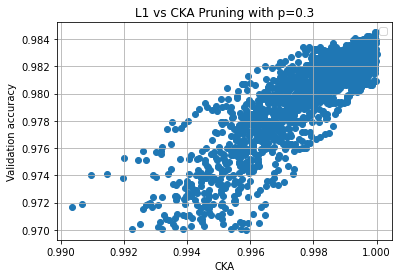

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


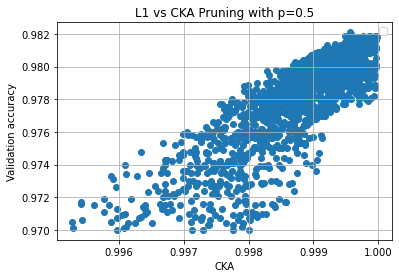

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


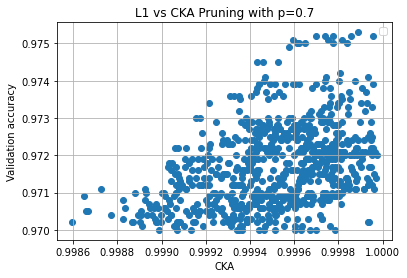

In [56]:
for dropout_rate in DROPOUT_RATES:
    plot_mean_val_acc_vs_mean_cka(data[dropout_rate], dropout_rate)